In [2]:
# Importing data and reading libraries
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\jvrdo\Downloads\tidy_table.csv")

In [3]:
# First look into data
df

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,4
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1
...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,NOSinvazivnikarcinom,2,100.0,35,1,42.0,luminal_B,5
9958,66,4.8,NOSinvazivnikarcinom,2,100.0,90,0,44.0,luminal_B,2
9959,57,0.8,NOSinvazivnikarcinom,2,25.0,25,1,34.0,luminal_B,3
9960,46,1.6,NOSinvazivnikarcinom,2,100.0,1,0,42.0,luminal_B,2


In [4]:
# Creating a dataframe copy to work on
df_c = df.copy()

In [5]:
# Creating a function that returns 1 if "broj meta lc" is >0:
def target(df_c):
    if df_c["broj_meta"] > 0:
        return 1
    else:
        return 0

In [6]:
# Applying function to our dataframe
df_c["Target"] = df_c.apply(lambda df_c: target(df_c), axis=1)

In [7]:
# Drop the old column
df_c.drop("broj_meta", axis=1, inplace=True)

In [19]:
# Checking how many her2 positive cancers there are
display(df_c["her2"].value_counts())

display(df_c["imunofenotip"].value_counts())

0    4458
1    3234
3    1137
2    1133
Name: her2, dtype: int64

luminal_B       4843
luminal_A       2694
luminal_B_Hp    1078
3n               950
Hp               397
Name: imunofenotip, dtype: int64

**Only values that have HER2= 3 are considered to be HER-2 positive tumours. Others are considered low-HER-2 activity.**
Hence the discrepancy in the values.

In [8]:
# Check the correlation matrix
df_c.corr()

,dob,velicina_mm,gradus,er,pr,her2,ki67,Target
dob,1.000000,0.080130,-0.031846,0.088897,0.010167,-0.077028,-0.101726,-0.011778
velicina_mm,0.080130,1.000000,0.230260,-0.128798,-0.101498,0.021683,0.188907,0.286726
gradus,-0.031846,0.230260,1.000000,-0.373753,-0.305029,0.182628,0.540072,0.124125
er,0.088897,-0.128798,-0.373753,1.000000,0.533571,-0.104222,-0.477567,-0.013537
pr,0.010167,-0.101498,-0.305029,0.533571,1.000000,-0.164716,-0.318077,-0.058741
her2,-0.077028,0.021683,0.182628,-0.104222,-0.164716,1.000000,0.115634,0.033604
ki67,-0.101726,0.188907,0.540072,-0.477567,-0.318077,0.115634,1.000000,0.082770
Target,-0.011778,0.286726,0.124125,-0.013537,-0.058741,0.033604,0.082770,1.000000


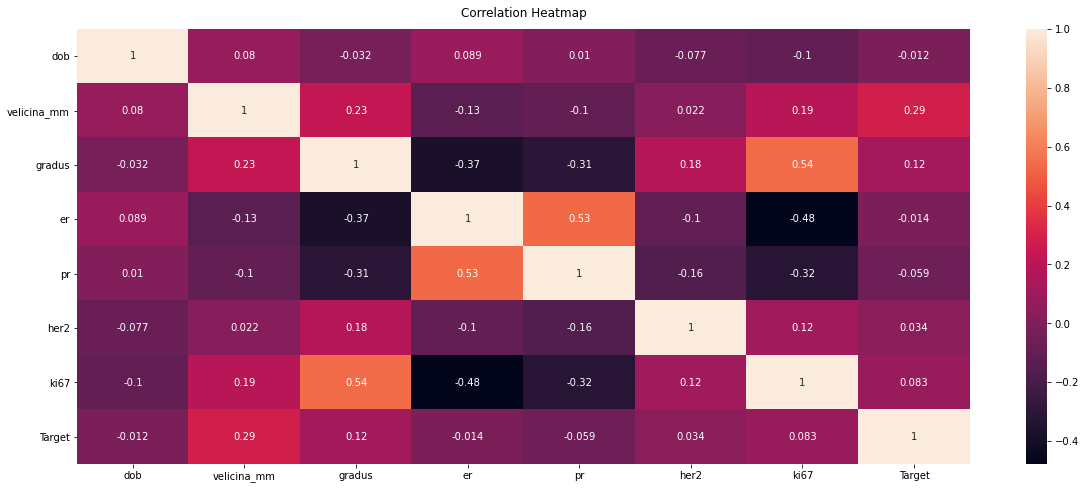

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing the heatmap size
plt.figure(figsize=(20, 8))
# Creating a correlation heatmap
heatmap= sns.heatmap(df_c.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [20]:
# Checking "histoloski_tip" unique values
df_c["hist_tip"].unique()

array(['NOSinvazivnikarcinom', 'lobularniinvazivni', 'mucinozniinvazivni',
       'tubularniinvazivni', 'drugirijetkitipovi',
       'Casmedularnimkarakteristikama', 'metaplastičnikarcinom',
       'mikropapilarniinvazivnikarcinom', 'Casapokrinomdiferencijacijom',
       'mikroinvazivnikarcinom', 'kribriformniinvazivni'], dtype=object)

In [21]:
# Checking result
df_c["imunofenotip"].value_counts()

luminal_B       4843
luminal_A       2694
luminal_B_Hp    1078
3n               950
Hp               397
Name: imunofenotip, dtype: int64

In [22]:
# Performing group by on "ki-67" and calculating the mean (for future feature engineering)
ki_67_gr= df_c.groupby("hist_tip")["ki67"].mean()

ki_67_gr.sort_values()

hist_tip
tubularniinvazivni                 10.306122
kribriformniinvazivni              17.808824
lobularniinvazivni                 19.590034
mucinozniinvazivni                 21.803687
Casapokrinomdiferencijacijom       24.846154
mikroinvazivnikarcinom             26.809524
drugirijetkitipovi                 26.888060
mikropapilarniinvazivnikarcinom    27.295775
NOSinvazivnikarcinom               30.220887
metaplastičnikarcinom              58.163636
Casmedularnimkarakteristikama      62.402778
Name: ki67, dtype: float64

In [52]:
# Creating new column with mean values of ki-67 for each type
df_c['hist_mean'] = df_c.groupby("hist_tip")["ki67"].transform('mean')

# Calculatin difference from the mean
df_c["diff_ki67"]= df_c["ki67"] - df_c["hist_mean"]


I also tried calculating mean size by hist group and thedifferences do not improve the AUC score on test sample. 

In [55]:
df_c.head(15)

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,Target,hist_mean,diff_ki67,size_mean,diff_size
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0,30.220887,64.779113,2.009635,-1.209635
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1,30.220887,4.779113,2.009635,-0.209635
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0,30.220887,-10.220887,2.009635,-0.809635
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,1,30.220887,4.779113,2.009635,0.990365
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1,30.220887,19.779113,2.009635,0.990365
5,58,3.7,NOSinvazivnikarcinom,2,98.0,80,3,40.0,luminal_B_Hp,1,30.220887,9.779113,2.009635,1.690365
6,77,6.0,NOSinvazivnikarcinom,3,0.0,0,2,60.0,3n,1,30.220887,29.779113,2.009635,3.990365
7,74,2.8,NOSinvazivnikarcinom,2,95.0,70,2,25.0,luminal_B,1,30.220887,-5.220887,2.009635,0.790365
8,80,2.5,NOSinvazivnikarcinom,3,0.0,0,2,50.0,Hp,1,30.220887,19.779113,2.009635,0.490365
9,60,2.2,NOSinvazivnikarcinom,2,80.0,80,2,20.0,luminal_B,0,30.220887,-10.220887,2.009635,0.190365


In [33]:
# Importing libraries
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.preprocessing import OrdinalEncoder


X= df_c.drop(["Target"], axis=1)
y= df_c["Target"]


In [24]:
# Picking numerical columns
num_cols = ["dob", "velicina_mm", "er", "pr", "her2", "ki67", "gradus"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=68, stratify=y)

In [26]:
# Scaling numerical data
scaler= StandardScaler()
X[num_cols]= scaler.fit_transform(X[num_cols])


In [27]:
X

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip
0,-0.020013,-0.757949,NOSinvazivnikarcinom,-0.004670,0.425624,0.498644,-0.891545,3.281509,luminal_B
1,1.087613,-0.173603,NOSinvazivnikarcinom,-0.004670,0.572657,1.255326,2.098548,0.303182,luminal_B_Hp
2,0.296451,-0.524210,NOSinvazivnikarcinom,-0.004670,0.572657,-0.888606,2.098548,-0.441400,luminal_B_Hp
3,0.771148,0.527612,NOSinvazivnikarcinom,-0.004670,0.131558,-1.191279,1.101850,0.303182,luminal_B
4,1.641426,0.527612,NOSinvazivnikarcinom,-0.004670,-2.368004,-1.266947,-0.891545,1.047763,3n
...,...,...,...,...,...,...,...,...,...
9957,-1.444104,-0.933252,NOSinvazivnikarcinom,-0.004670,0.572657,-0.384152,0.105153,0.650653,luminal_B
9958,0.375568,1.579435,NOSinvazivnikarcinom,-0.004670,0.572657,1.003098,-0.891545,0.749931,luminal_B
9959,-0.336478,-0.757949,NOSinvazivnikarcinom,-0.004670,-1.632838,-0.636379,0.105153,0.253543,luminal_B
9960,-1.206756,-0.290472,NOSinvazivnikarcinom,-0.004670,0.572657,-1.241724,-0.891545,0.650653,luminal_B


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

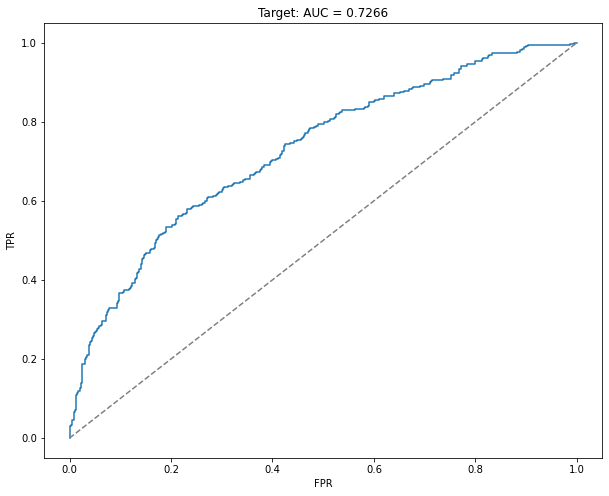

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    predictions_h1, 
    'Target',
    ax=ax
)

## Random Forrest

In [64]:
df_dummies = pd.get_dummies(df_c, columns=['hist_tip'])

In [65]:
# Checking result
df_dummies.drop(["imunofenotip","size_mean"], axis=1, inplace=True)


In [66]:
df_dummies

,dob,velicina_mm,gradus,er,pr,her2,ki67,Target,hist_mean,diff_ki67,...,hist_tip_Casmedularnimkarakteristikama,hist_tip_NOSinvazivnikarcinom,hist_tip_drugirijetkitipovi,hist_tip_kribriformniinvazivni,hist_tip_lobularniinvazivni,hist_tip_metaplastičnikarcinom,hist_tip_mikroinvazivnikarcinom,hist_tip_mikropapilarniinvazivnikarcinom,hist_tip_mucinozniinvazivni,hist_tip_tubularniinvazivni
0,61,0.8,2,95.0,70,0,95.0,0,30.220887,64.779113,...,0,1,0,0,0,0,0,0,0,0
1,75,1.8,2,100.0,100,3,35.0,1,30.220887,4.779113,...,0,1,0,0,0,0,0,0,0,0
2,65,1.2,2,100.0,15,3,20.0,0,30.220887,-10.220887,...,0,1,0,0,0,0,0,0,0,0
3,71,3.0,2,85.0,3,2,35.0,1,30.220887,4.779113,...,0,1,0,0,0,0,0,0,0,0
4,82,3.0,2,0.0,0,0,50.0,1,30.220887,19.779113,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,2,100.0,35,1,42.0,1,30.220887,11.779113,...,0,1,0,0,0,0,0,0,0,0
9958,66,4.8,2,100.0,90,0,44.0,1,30.220887,13.779113,...,0,1,0,0,0,0,0,0,0,0
9959,57,0.8,2,25.0,25,1,34.0,1,30.220887,3.779113,...,0,1,0,0,0,0,0,0,0,0
9960,46,1.6,2,100.0,1,0,42.0,1,30.220887,11.779113,...,0,1,0,0,0,0,0,0,0,0


In [67]:
# New train test split after encoding categorical variables
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop("Target", axis=1), y, test_size = 0.1, random_state=68, stratify=y)

## Testing baseline version of Random Forrest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [43]:
y_pred = clf.predict_proba(X_test)

y_pred= y_pred[:,1].reshape(-1,1)

y_pred

array([[0.48246506],
       [0.33545081],
       [0.33801283],
       [0.47907013],
       [0.37016736],
       [0.49059538],
       [0.31496295],
       [0.36154947],
       [0.24933761],
       [0.26839083],
       [0.32793969],
       [0.47982887],
       [0.37350681],
       [0.33793241],
       [0.32501809],
       [0.3026691 ],
       [0.33091064],
       [0.31720919],
       [0.35223546],
       [0.3102294 ],
       [0.26345645],
       [0.35505067],
       [0.47798605],
       [0.33089898],
       [0.48661283],
       [0.47994722],
       [0.27593629],
       [0.42170839],
       [0.48067679],
       [0.34427138],
       [0.34188196],
       [0.34733539],
       [0.29772069],
       [0.35484746],
       [0.33785935],
       [0.4832179 ],
       [0.33287131],
       [0.48684547],
       [0.33914589],
       [0.28327043],
       [0.33700108],
       [0.44809212],
       [0.31303641],
       [0.23583672],
       [0.47374919],
       [0.33405203],
       [0.48318789],
       [0.326

In [44]:
roc_auc_score(y_test, y_pred)

0.7017212645174731

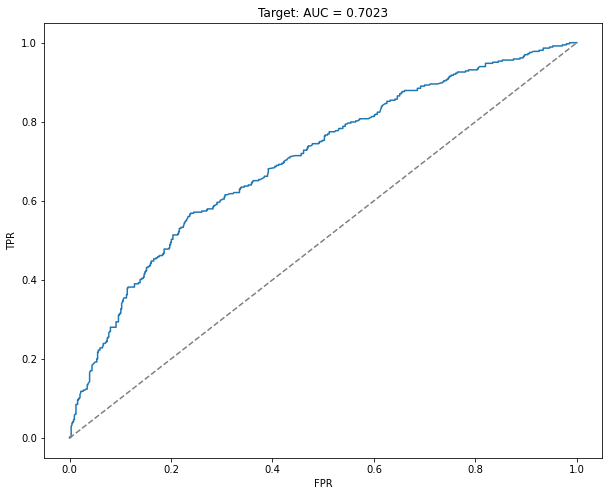

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    y_pred, 
    'Target',
    ax=ax
)

In [88]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [90]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [91]:
# find best model score
bestF.score(X_train, y_train)

0.9994422755158952

## Optimizing with StratifiedKFold and HalvingGridSearchCV

In [55]:
# Optimization n_2
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
# parameter grid
pgrid = {    
    'max_depth' : [101],    
    'min_samples_split' : [3,4,10],
    'min_samples_leaf' : [1,2],
    'class_weight': ['balanced','balanced_subsample']
}

# specifying the cv
cv_skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# specifying the model 
rfgs = BalancedRandomForestClassifier(n_jobs=-1)



# specify the grid search cv
cv = HalvingGridSearchCV(estimator=rfgs,param_grid=pgrid,cv=cv_skf,n_jobs=-1,verbose=10, scoring='accuracy',random_state=0)

cc= cv.fit(X_train,y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 996
max_resources_: 8965
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 996
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 2988
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 8964
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [56]:
cc.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 101,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [68]:
# Running the optimized randomforrest
clf_optimized = RandomForestClassifier(max_depth=101, min_samples_leaf=1, n_estimators=1000, min_samples_split=3, random_state=68,
                                      class_weight="balanced_subsample")
clf_optimized.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=101,
                       min_samples_split=3, n_estimators=1000, random_state=68)

In [69]:
y_pred_o = clf_optimized.predict_proba(X_test)

y_pred_o= y_pred_o[:,1].reshape(-1,1)

y_pred_o

array([[0.6124627 ],
       [0.22672336],
       [0.32509085],
       [0.22226722],
       [0.55845746],
       [0.4655054 ],
       [0.19980487],
       [0.57523452],
       [0.05097423],
       [0.11763486],
       [0.1276733 ],
       [0.39750852],
       [0.69126359],
       [0.33729494],
       [0.66340406],
       [0.04655358],
       [0.25023655],
       [0.43575443],
       [0.43024537],
       [0.167058  ],
       [0.11179288],
       [0.07005015],
       [0.73766388],
       [0.17352841],
       [0.87307634],
       [0.60093146],
       [0.23389169],
       [0.43464597],
       [0.75099621],
       [0.11674888],
       [0.12117872],
       [0.61367579],
       [0.15703476],
       [0.44973348],
       [0.21142739],
       [0.76608152],
       [0.22260939],
       [0.38675084],
       [0.50425207],
       [0.09870307],
       [0.59269417],
       [0.67138699],
       [0.21532692],
       [0.08191313],
       [0.78072901],
       [0.26768442],
       [0.52104982],
       [0.491

In [70]:
roc_auc_score(y_test, y_pred_o)

0.8162552297623388

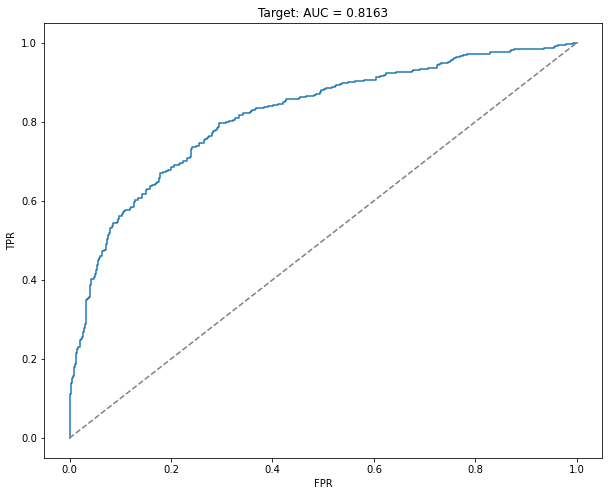

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_roc(
    y_test, 
    y_pred_o, 
    'Target',
    ax=ax
)

## XGBoost

In [72]:
# Importing XGBoost
import xgboost as xgb

# Initiating XGBoost classifier
xgc = xgb.XGBClassifier(
    tree_method="gpu_hist"
)

# Fitting the model
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
# Baseline XBG predictions
y_pred_x= xgc.predict_proba(X_test)

y_pred_x= y_pred_x[:,1].reshape(-1,1)

y_pred_x

array([[0.67317086],
       [0.23599525],
       [0.47679472],
       [0.29223186],
       [0.45706326],
       [0.61385983],
       [0.08464209],
       [0.46741349],
       [0.02027935],
       [0.17524244],
       [0.28014246],
       [0.3766804 ],
       [0.6107849 ],
       [0.35439965],
       [0.7371646 ],
       [0.10975687],
       [0.3407611 ],
       [0.39026842],
       [0.54905057],
       [0.08831318],
       [0.16137345],
       [0.00619062],
       [0.8191589 ],
       [0.33642834],
       [0.6222239 ],
       [0.6883504 ],
       [0.36514106],
       [0.31101036],
       [0.7039581 ],
       [0.10425709],
       [0.06606628],
       [0.37588835],
       [0.13735254],
       [0.42389843],
       [0.29856253],
       [0.6892126 ],
       [0.37487495],
       [0.5749985 ],
       [0.34097293],
       [0.0173518 ],
       [0.5284351 ],
       [0.862536  ],
       [0.13871345],
       [0.00636442],
       [0.5425416 ],
       [0.31157222],
       [0.37195167],
       [0.468

In [75]:
# Baseline XGB score
roc_auc_score(y_test, y_pred_x)


0.7568269013766644

In [82]:
# Checking metric names
from sklearn import metrics

metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

## Optimizing XGB

In [ ]:
# Importing Grid search 
from sklearn.model_selection import GridSearchCV

# Setting out parameter values
params = { 'max_depth': [3,10,100],
           'learning_rate': [0.01, 0.1],
           'n_estimators': [100, 1000],
           'colsample_bytree': [0.3, 0.7]}


# Initiating GridSearch CV
clf = GridSearchCV(estimator=xgc, 
                   param_grid=params,
                   scoring='roc_auc', 
                   verbose=-1)
# Fitting GridSearch to our training data
clf.fit(X_train, y_train)